In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from src.figure_utilities import (
    PAGE_HEIGHT,
    ONE_COLUMN,
    TWO_COLUMN,
    save_figure,
    set_figure_defaults,
)
import pandas as pd
from glob import glob
import os
from src.parameters import PROCESSED_DATA_DIR
import numpy as np
import seaborn as sns

set_figure_defaults()

('bon', 3, 2)
n_ripples = 251
median shuffle = 52
Spatially Coherent = 29
p-value = 0.02


('bon', 3, 2)
n_ripples = 251
median shuffle = 243
Spatially Incoherent = 181
p-value = 0.02


('remy', 35, 2)
n_ripples = 344
median shuffle = 53
Spatially Coherent = 26
p-value = 0.02


('remy', 35, 2)
n_ripples = 344
median shuffle = 263
Spatially Incoherent = 210
p-value = 0.02




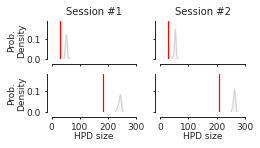

In [3]:
fig, axes = plt.subplots(
    2, 2, figsize=(ONE_COLUMN, PAGE_HEIGHT / 5), constrained_layout=True, sharey=True, sharex=True
)

epoch_keys = [("bon", 3, 2), ("remy", 35, 2)]

for epoch_ind, (ax, epoch_key) in enumerate(zip(axes.T, epoch_keys)):
    animal, day, epoch = epoch_key
    file_regex = f'{animal}_{day:02d}_{epoch:02d}_clusterless_1D_replay_info_run_position_shuffle_*.csv'
    file_paths = glob(os.path.join(PROCESSED_DATA_DIR, 'run_position_shuffle', file_regex))
    replay_info_shuffle = pd.concat(
        [pd.read_csv(file_path).assign(shuffle=shuffle_ind) for shuffle_ind, file_path in enumerate(file_paths)], axis=0,
    )

    replay_info = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, f'{animal}_{day:02d}_{epoch:02d}_clusterless_1D_replay_info_80.csv'))
    
    # Spatially Coherent
    shuffle = replay_info_shuffle.groupby('shuffle').apply(lambda df: np.nanmean(np.asarray(df[["Hover_spatial_coverage", "Hover-Continuous-Mix_spatial_coverage", "Continuous_spatial_coverage"]]).ravel()))
    sns.distplot(shuffle, color="lightgrey", ax=ax[0])
    estimate = np.nanmean(np.asarray(replay_info.loc[:, ["Hover_spatial_coverage", "Hover-Continuous-Mix_spatial_coverage", "Continuous_spatial_coverage"]]).ravel())
    ax[0].axvline(estimate, color='red', zorder=100)
    ax[0].set_xlim((0, 100))
    
    N_SHUFFLES = 50
    print(epoch_key)
    print(f"n_ripples = {replay_info.shape[0]}")
    print(f"median shuffle = {np.median(shuffle):.0f}")
    print(f"Spatially Coherent = {estimate:.0f}")
    print(
        f"p-value = {(np.sum(estimate >= shuffle) + 1) / (N_SHUFFLES + 1):0.2f}"
    )
    print("\n")
    
    
    # Spatially Incoherent
    shuffle = replay_info_shuffle.groupby('shuffle').apply(lambda df: np.nanmean(np.asarray(df[["Fragmented-Continuous-Mix_spatial_coverage", "Fragmented_spatial_coverage"]]).ravel()))
    sns.distplot(shuffle, color="lightgrey", ax=ax[1])
    
    estimate = np.nanmean(np.asarray(replay_info.loc[:, ["Fragmented-Continuous-Mix_spatial_coverage", "Fragmented_spatial_coverage"]]).ravel())
    ax[1].axvline(estimate, color='red', zorder=100)
    ax[1].set_xlim((0, 300))
    
    print(epoch_key)
    print(f"n_ripples = {replay_info.shape[0]}")
    print(f"median shuffle = {np.median(shuffle):.0f}")
    print(f"Spatially Incoherent = {estimate:.0f}")
    print(
        f"p-value = {(np.sum(estimate >= shuffle) + 1) / (N_SHUFFLES + 1):0.2f}"
    )
    print("\n")
    
axes[0, 0].set_title('Session #1', fontsize=10)
axes[0, 1].set_title('Session #2', fontsize=10)
axes[1, 0].set_xlabel('HPD size')
axes[1, 1].set_xlabel('HPD size')
axes[0, 0].set_ylabel('Prob.\nDensity')
axes[1, 0].set_ylabel('Prob.\nDensity')
sns.despine(offset=5)

save_figure(
    os.path.join("Figure4-supplemental2", "figure4-supplemental2_spatial_coherent_incoherent")
)